In [152]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=4
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "1" # export NUMEXPR_NUM_THREADS=6


import json
import requests
from pymatgen import MPRester
import pandas as pd
import json
from mendeleev import element
import requests
import numpy as np
import matplotlib.pyplot as plt

from pymatgen.core.structure import Structure
import random


"""
MAKE SURE TO HAVE THE SAME SEED ALWAYS
"""
import matplotlib as mpl
np.random.seed(666)
random.seed(666)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from joblib import Parallel, delayed
from sklearn.base import BaseEstimator, RegressorMixin
from numpy import linalg as LA
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
import itertools
import pandas as pd
from tqdm import tqdm
import numpy as np




fontsize = 18
#"""
plt.rc('font',       size=fontsize)    # controls default text sizes
plt.rc('axes',  titlesize=fontsize)    # fontsize of the axes title
plt.rc('axes',  labelsize=fontsize)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fontsize)    # fontsize of the tick labels
plt.rc('legend', fontsize=fontsize)    # legend fontsize
plt.rc('figure',titlesize=fontsize)    # fontsize of the figure title


. Consider the random number yn = n
1/2 Pn
i=1 xi
, calculated as a sum of independent
random numbers xi that are drawn from a uniform distribution with zero mean
and σ
2 = 1. How quickly, as a function of n, does the distribution of yn converge
towards the normal distribution? Plot the difference between the moments hy
4
n
i
and hy
6
n
i and their respective asymptotic values, for n ∈ [1, 30]. Also, plot the
distribution of yn for n = 1, 2, 3, 5, 10, together with the Normal distribution. If
your machine is fast enough, use many tens of thousands of samples to get good
statistics (Name_P12.png).

In [167]:
#https://www.ucd.ie/msc/t4media/Uniform%20Distribution.pdf
#(2 a)^2 / 12 = 1
import scipy

def nmoment(x, n):
    mean  = np.mean(x)

    return np.mean((x-mean)**n)


def yield_y(n):
    sq3 = np.sqrt(3)

    return (n)**(-0.5) * np.sum(np.random.uniform(-sq3, sq3, size =  n))


def gen_smpls(N, n):
    samples = [yield_y(n) for i in range(N)]
    return samples



N    = 500000
mu_3 = nmoment(, fiefsefwedddddvsdvsns.kdeplot(np.random.normal(size = N),ls='--',ax=ax5), ef,3)
mu_4 = nmoment(np.random.normal(size = N),4)
mu_5 = nmoment(np.random.normal(size = N),5)
mu_6 = nmoment(np.random.normal(size = N),6)



mu_3_appx = []
mu_4_appx = []
mu_5_appx = []
mu_6_appx = []




n_range = np.arange(1, 31) #[1, 2, 3, 5, 10]

for n in n_range:

    samples = gen_smpls(N, n)
    mu_3_appx.append(nmoment(samples,3))
    mu_4_appx.append(nmoment(samples,4))
    mu_5_appx.append(nmoment(samples,5))
    mu_6_appx.append(nmoment(samples,6))
    

    #print(nmoment(samples,4), np.std(samples))
    #print (np.mean(samples))




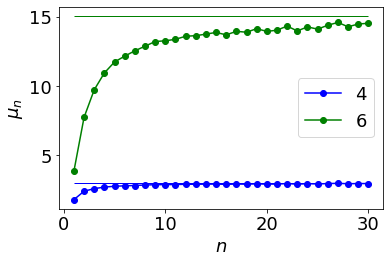

In [168]:
fig, ax = plt.subplots()


#ax.set_xscale("log")
#ax.plot(n_range, mu_3_appx,'-o',label='3' )
ax.set_xlabel("$n$", fontsize=fontsize)
ax.set_ylabel(r"$\mu_{n}$", fontsize=fontsize)
ax.hlines(y=mu_4, xmin=1, xmax=30, linewidth=1, color='b')
ax.plot(n_range, mu_4_appx,'-o',color='blue', label='4' )
#ax.plot(n_range, mu_5_appx,'-o',label='5' )
ax.hlines(y=mu_6, xmin=1, xmax=30, linewidth=1, color='green')
ax.plot(n_range, mu_6_appx,'-o',color='green', label='6' )

plt.legend(fontsize=fontsize)
plt.tight_layout()
plt.savefig("./figures/convergence.pdf")


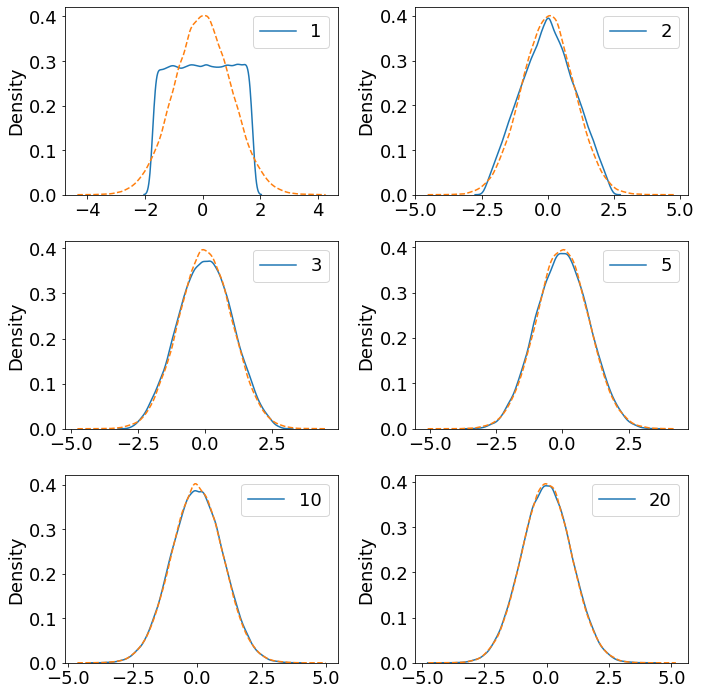

In [205]:
fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(3, 2, figsize= (10, 10))
N = 100000
sns.kdeplot(gen_smpls(N, 1   ),ax=ax0, label = '1')
sns.kdeplot(gen_smpls(N, 2   ),ax=ax1, label = '2')
sns.kdeplot(gen_smpls(N, 3   ),ax=ax2, label = '3')
sns.kdeplot(gen_smpls(N, 5   ),ax=ax3, label = '5')
sns.kdeplot(gen_smpls(N, 10  ),ax=ax4, label = '10')
sns.kdeplot(gen_smpls(N, 20  ),ax=ax5, label = '20')


sns.kdeplot(np.random.normal(size = N),ls='--',ax=ax0)
sns.kdeplot(np.random.normal(size = N),ls='--',ax=ax1)
sns.kdeplot(np.random.normal(size = N),ls='--',ax=ax2)
sns.kdeplot(np.random.normal(size = N),ls='--',ax=ax3)
sns.kdeplot(np.random.normal(size = N),ls='--',ax=ax4)
sns.kdeplot(np.random.normal(size = N),ls='--',ax=ax5)

ax0.legend(fontsize=fontsize)
ax1.legend(fontsize=fontsize)
ax2.legend(fontsize=fontsize)
ax3.legend(fontsize=fontsize)
ax4.legend(fontsize=fontsize)
ax5.legend(fontsize=fontsize)

plt.tight_layout()

In [ ]:
efwef


In [237]:
def getcolumn(filename, column, mode='float'):
    dat=np.loadtxt(filename , usecols=column, dtype=mode)
    return dat

def autocorrelation (x) :
    """
    Compute the autocorrelation of the signal, based on the properties of the
    power spectral density of the signal.
    """
    xp = x-np.mean(x)
    f = np.fft.fft(xp)
    p = np.array([np.real(v)**2+np.imag(v)**2 for v in f])
    pi = np.fft.ifft(p)
    return np.real(pi)[:x.size/2]/np.sum(xp**2)



def direct_autocorrelation (x) :
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]    


file = 'harmonic.dat'
x = getcolumn("./station_harmonic/"+file, 0, mode='float')
xp = x-np.mean(x)
f = np.fft.fft(xp)
p = np.array([np.real(v)**2+np.imag(v)**2 for v in f])
pi = np.fft.ifft(p)
S = np.real(pi)/np.sum(xp**2)
#https://www.kite.com/python/answers/how-to-plot-a-power-spectrum-in-python
#S = autocorrelation (x) #(1/(2*np.pi*len(x)))*(np.abs(np.fft.rfft(x))**2)

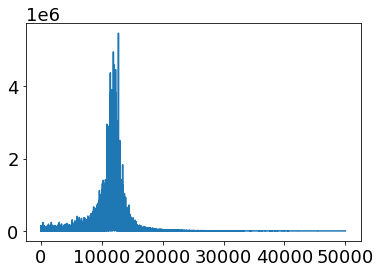

In [245]:
plt.plot(p[:50000])

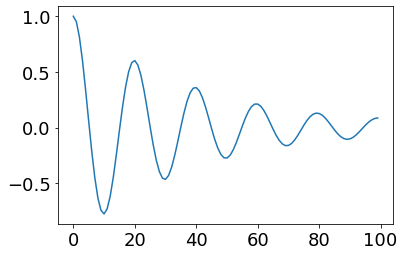

In [247]:
plt.plot(S[:100])

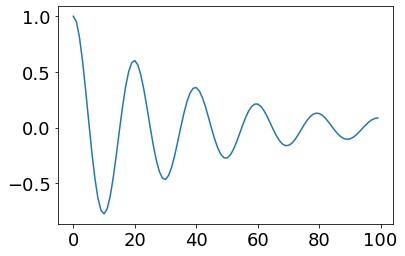

In [249]:
plt.plot(direct_autocorrelation(x)[:100]/np.sum(xp**2))

(0.0, 400.0)

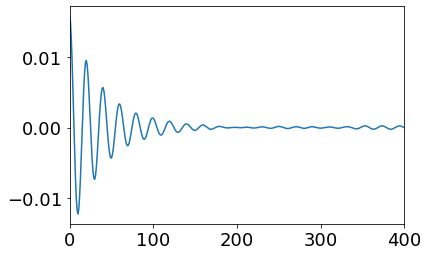

In [224]:
plt.plot(np.fft.irfft(S))
plt.xlim(0, 400)